# Titanic - Machine Learning from Disaster
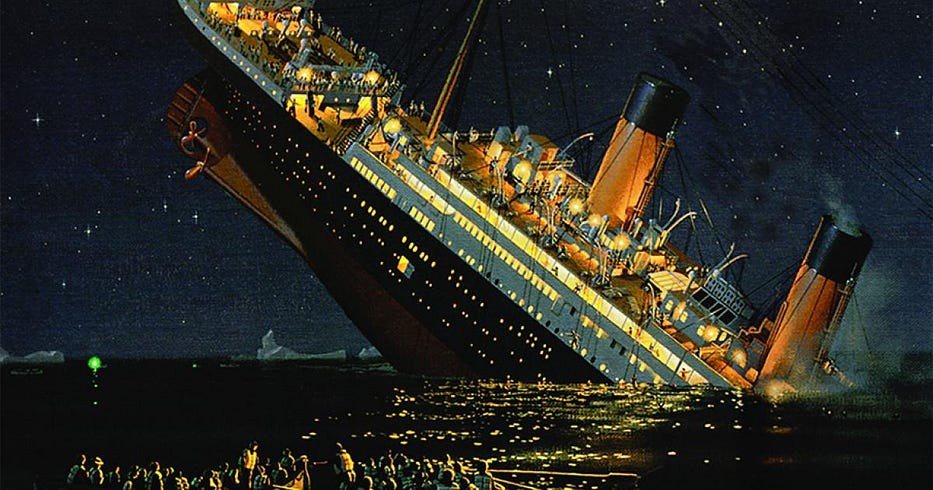
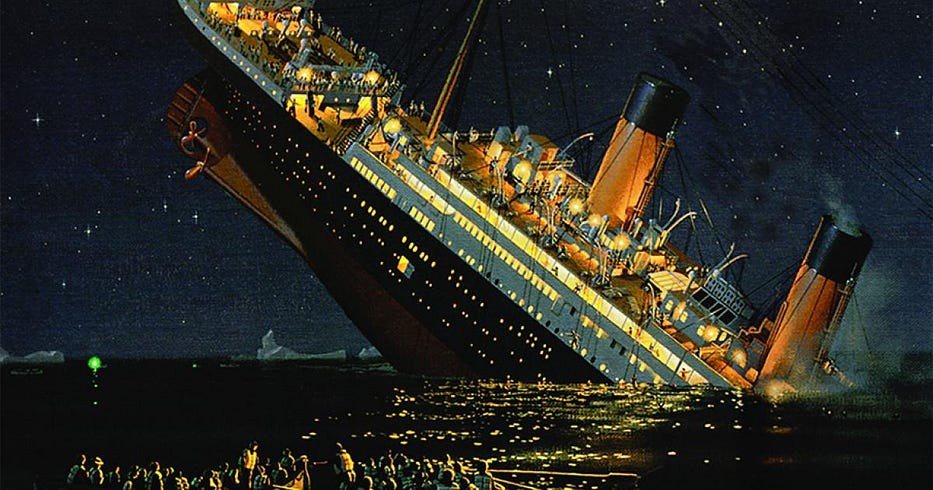

## 1. Importing necessary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis

Let's do some quick analysis of our dataset

In [3]:
train.shape

(891, 12)

very small dataset, also the test set doesn't contain target labels that's why Cross Validation is a good option to evaluate the performances of models to be trained

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are many missing values in the Cabin column and some in the Age column

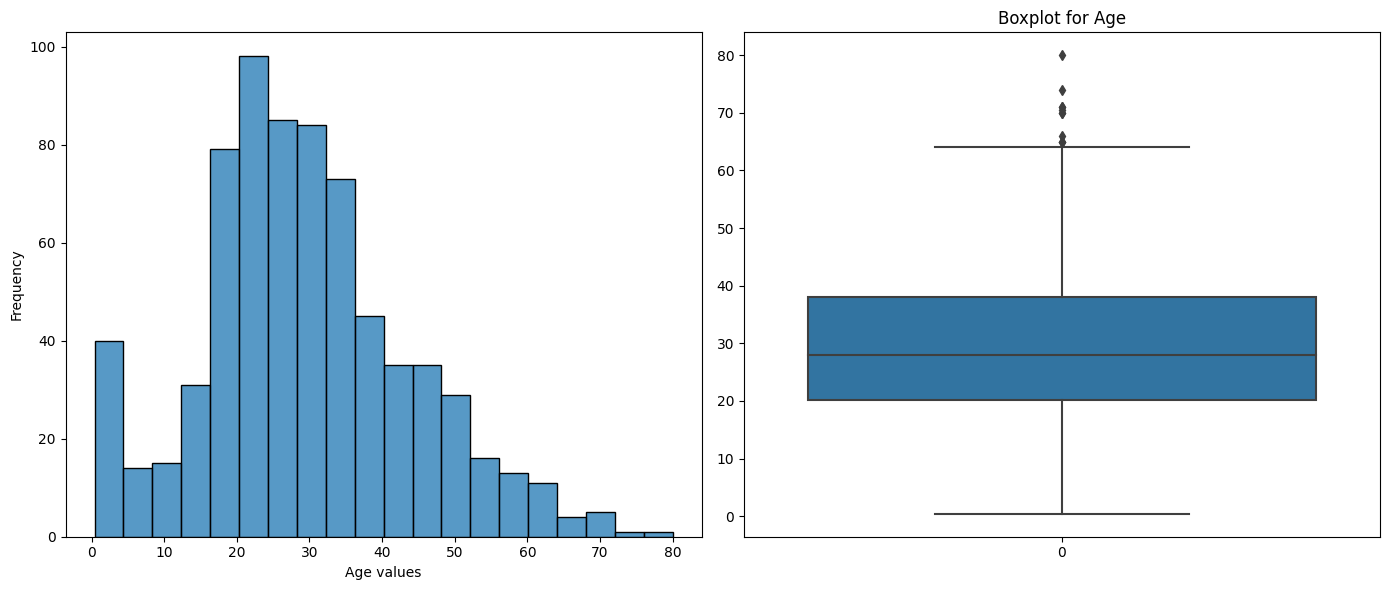

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(train['Age'], ax=axes[0])
axes[0].set_xlabel('Age values')
axes[0].set_ylabel('Frequency')

sns.boxplot(train['Age'], ax=axes[1])
axes[1].set_title('Boxplot for Age')

plt.tight_layout()
plt.show()

The 'Age' variable distribution is right-skewed, so mean imputing can cause problems as it's sensitive to outliers - applying median instead will be a better option. Instead of imputing right here, we will fill in na after the feature engineering where we can use some columns to get more accurate values for Age missing

In [9]:
miss = (train['Cabin'].isna().sum())/len(train['Cabin'])
print(f'Cabin missing {round(miss*100, 2)}% of values')

Cabin missing 77.1% of values


In [10]:
print(train['Cabin'].unique())
print(train['Cabin'].nunique(), 'unique values')

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
147 unique values


although more than half of the values are missing and the column contains 147 unique values, 'it can still give us important insights, I will keep it and create a separate class with missing values, later the cabin letter (deck) will be extracted as a separate feature

In [11]:
train.fillna({"Cabin":"U"}, inplace=True) #U for the Unknown

Since the dataset is small, every bit of data is needed, for the Embarked with 2 missing values I will impute those with the mode

In [12]:
mode = train['Embarked'].mode()[0] #more than 1 modes possible, therefore use the indexing to choose one
train.fillna({"Embarked": mode}, inplace=True)

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

All the missing values are addressed, let's check for duplicates

In [14]:
train['PassengerId'].duplicated().sum()

0

In [15]:
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Dooley, Mr. Patrick",male,1601,U,S
freq,1,577,7,687,646


Assuming that family members shared the same ticket (as we have only 681 unique tickets out of 891), we can create a new binary feature to indicate if a passenger had a **shared** ticket or no apart form the 'TicketGroupSize'

## 3. Feature Engineering

In [16]:
ticket_counts = train['Ticket'].value_counts()
train['TicketGroupSize'] = train['Ticket'].map(ticket_counts)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1


In [17]:
train['SharedTicket'] = (train['TicketGroupSize']>1).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,0


Also, it might be the case that passengers with bigger families had lower or higher chances of survival than passengers who were travelling alone, let's create a feature 'FamilySize' feature

In [18]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,0,1


As mentioned earlier, let's create a new feature using the first letter form the 'Cabin' column which means 'Deck'

In [19]:
train['Deck'] = train['Cabin'].str[0]

In [20]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,U,S,1,0,1,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,0,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,U,S,2,1,4,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0,1,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,U,Q,1,0,1,U


good, now we have a new feature called 'Deck', let's also try to extract titles from the names

In [21]:
train['Name'].sample(5)

547                  Padro y Manent, Mr. Julian
455                          Jalsevac, Mr. Ivan
148    Navratil, Mr. Michel ("Louis M Hoffman")
494                  Stanley, Mr. Edward Roland
841                    Mudd, Mr. Thomas Charles
Name: Name, dtype: object

In [22]:
train['Title'] = train['Name'].str.extract(r',\s*([^.]*)\.')

In [23]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Let's group the titles to have fewer categories to also capture gender + age + social status

In [24]:
train['Title'] = train['Title'].replace({
    #Foregign titles !Ms will be also substituted by Miss as Ms became popular in the 1950s only 
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    
    #Officer titles (military, professional, clergy)
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    
    #Royalty/nobility titles
    'Don': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty'
})

so we ended up with "Mme" and "Mlle" which are French for "Mrs" and "Miss" respectively, we can combine those 

In [25]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [26]:
# Median age for each Title group
title_age_median = train.groupby('Title')['Age'].median()
print(title_age_median)

Title
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Officer    50.0
Royalty    40.0
Name: Age, dtype: float64


Now we can impute missing values for the 'Age' column

In [27]:
train['Age'] = train.apply(lambda row: title_age_median[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,0,2,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,2,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,0,1,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,2,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,0,1,U,Mr


In [28]:
train['Age'].isnull().sum()

0

Now, let's also do some feature engineering using the 'Age' column, we can group passengers into categories based on their ages

In [29]:
print(f"The passengers age range between: {train['Age'].min()} and {train['Age'].max()}")

The passengers age range between: 0.42 and 80.0


In [30]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child','Teen','Adult','Middle','Senior'])

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,0,2,U,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,2,C,Mrs,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,0,1,U,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,2,C,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,0,1,U,Mr,Adult


In [32]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [33]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title,AgeGroup
693,0,3,male,25.0,0,0,7.2250,C,1,0,1,U,Mr,Adult
169,0,3,male,28.0,0,0,56.4958,S,7,1,1,U,Mr,Adult
311,1,1,female,18.0,2,2,262.3750,C,2,1,5,B,Miss,Teen
761,0,3,male,41.0,0,0,7.1250,S,1,0,1,U,Mr,Middle
330,1,3,female,21.0,2,0,23.2500,Q,2,1,3,U,Miss,Adult


## 4. Analysis through Visualizations 


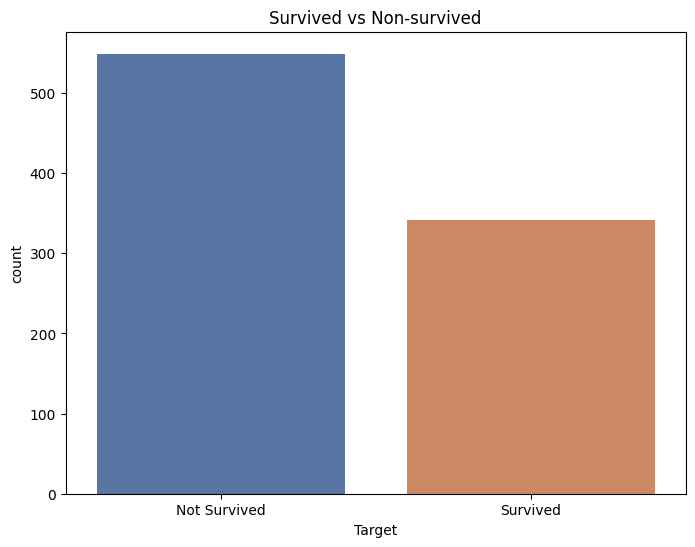

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Survived', palette='deep')
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.xlabel('Target')
plt.title('Survived vs Non-survived')
plt.show()

the dataset is imbalanced, during the evaluation we can't rely on accuracy only

In [35]:
survivors = train[train['Survived']==1]
fm_counts = survivors['Sex'].value_counts()

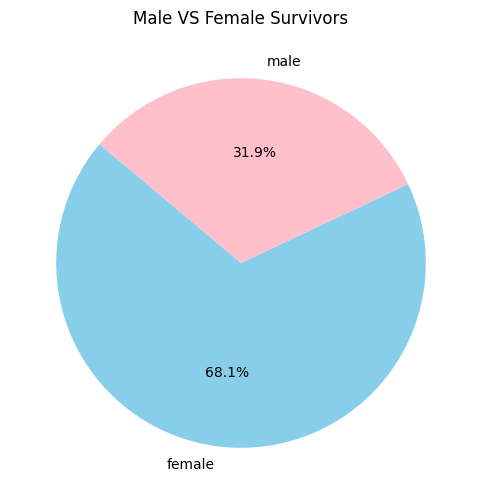

In [36]:
plt.figure(figsize=(8, 6))
plt.pie(fm_counts, labels=fm_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Male VS Female Survivors')
plt.show()

mostly women survived

In [37]:
corr = train.corr(numeric_only=True)

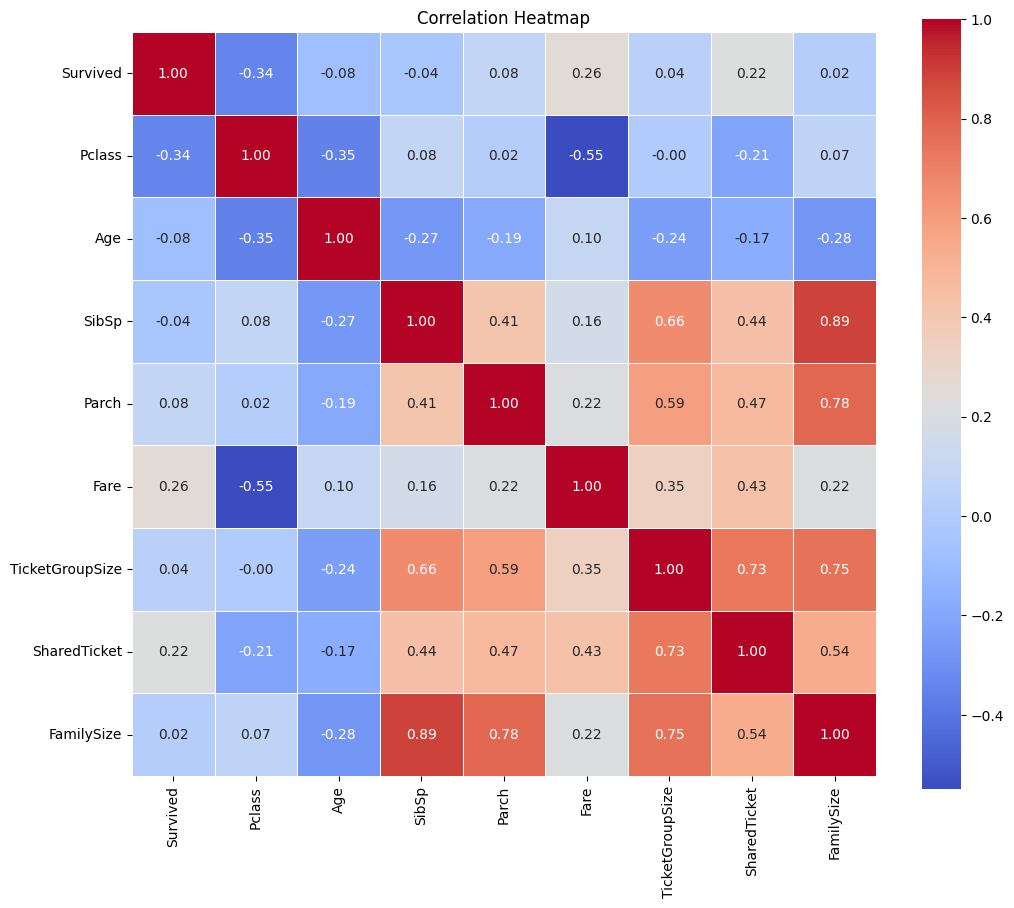

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

With the newly engineered features even, there is not much linear relationship between the target variable, so it is better to fit non-linear models, that's why I will keep features highly correlated 

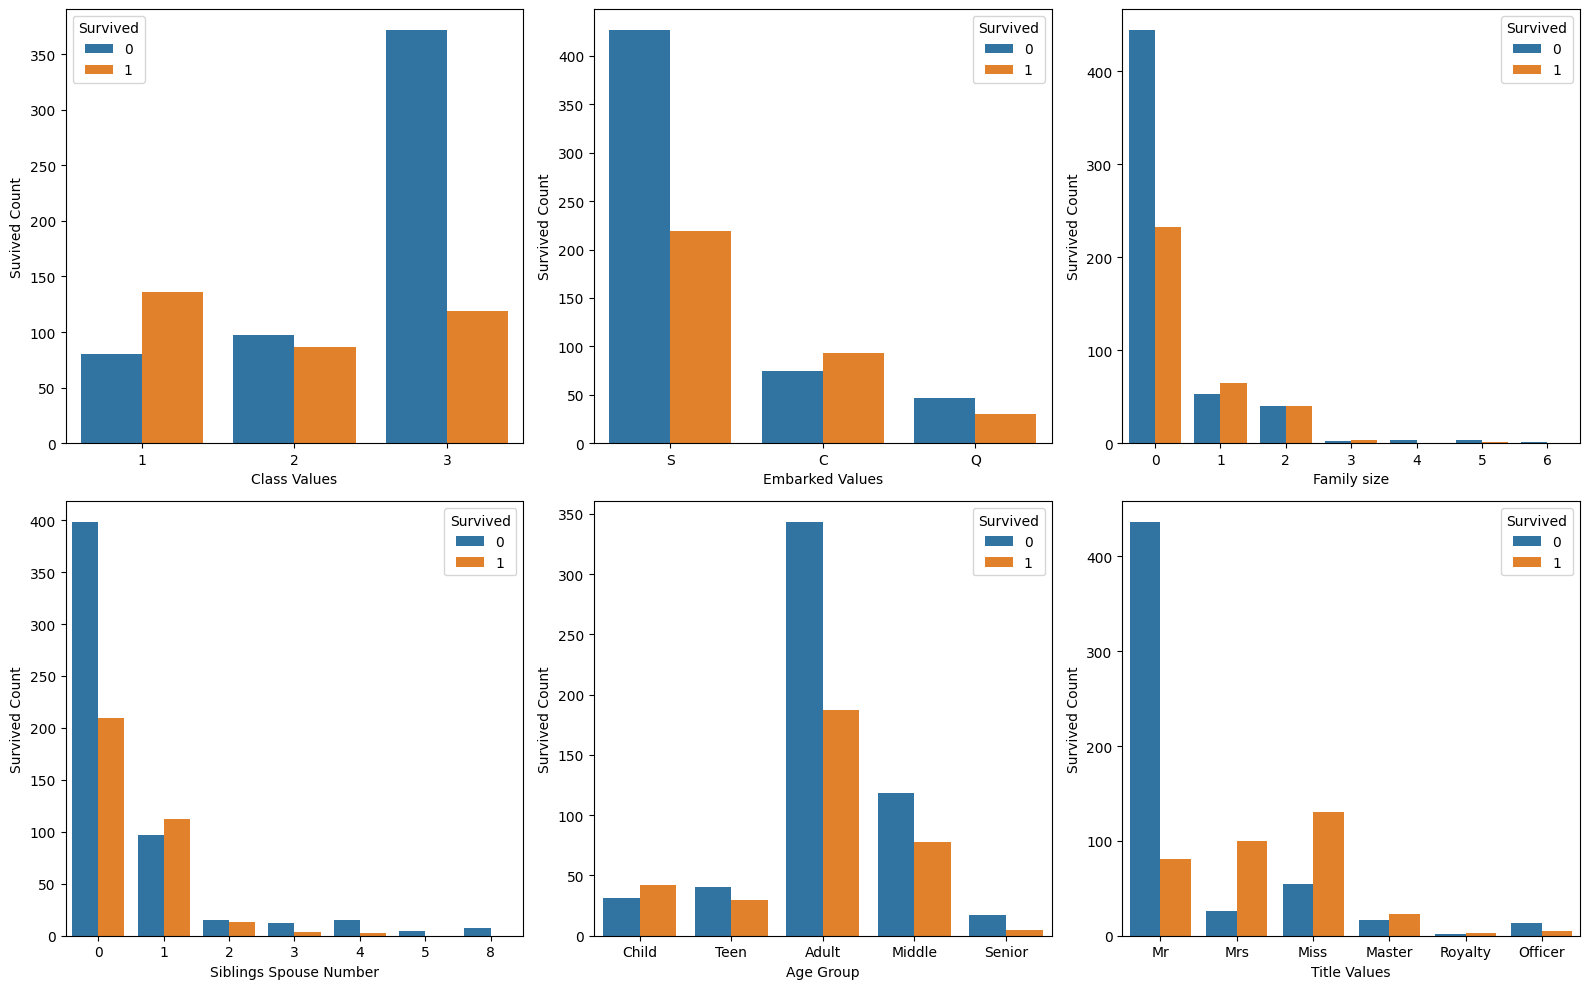

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_xlabel('Class Values')
axes[0, 0].set_ylabel('Suvived Count')

sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_xlabel('Embarked Values')
axes[0, 1].set_ylabel('Survived Count')

sns.countplot(data=train, x='Parch', hue='Survived', ax=axes[0, 2])
axes[0, 2].set_xlabel('Family size')
axes[0, 2].set_ylabel('Survived Count')

sns.countplot(data=train, x='SibSp', hue='Survived', ax=axes[1,0])
axes[1, 0].set_xlabel('Siblings Spouse Number')
axes[1, 0].set_ylabel('Survived Count')

sns.countplot(data=train, x='AgeGroup', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Survived Count')

sns.countplot(data=train, x='Title', hue='Survived', ax=axes[1,2])
axes[1, 2].set_xlabel('Title Values')
axes[1, 2].set_ylabel('Survived Count')

plt.tight_layout()
plt.show()

## 5. Encoding Categorical Columns

In [40]:
train['Sex'] = train['Sex'].map( {'male': 0, 'female': 1,} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,S,1,0,2,U,Mr,Adult
1,1,1,1,38.0,1,0,71.2833,C,1,0,2,C,Mrs,Middle
2,1,3,1,26.0,0,0,7.9250,S,1,0,1,U,Miss,Adult
3,1,1,1,35.0,1,0,53.1000,S,2,1,2,C,Mrs,Adult
4,0,3,0,35.0,0,0,8.0500,S,1,0,1,U,Mr,Adult


In [41]:
embarked_encoded = pd.get_dummies(train['Embarked'], prefix='Port', dtype=int)
train = pd.concat([train, embarked_encoded], axis=1)

In [42]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title,AgeGroup,Port_C,Port_Q,Port_S
0,0,3,0,22.0,1,0,7.2500,S,1,0,2,U,Mr,Adult,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,2,C,Mrs,Middle,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,1,0,1,U,Miss,Adult,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,2,1,2,C,Mrs,Adult,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,1,0,1,U,Mr,Adult,0,0,1


In [43]:
train['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

lots of categories for 'Deck' column, one-hot encoding will increase the dimensionality, so I will use label encoding (safe for Tree-based models)

In [44]:
from sklearn.preprocessing import LabelEncoder

le_deck = LabelEncoder()
train['Deck_Encoded'] = le_deck.fit_transform(train['Deck'])

In [45]:
le_title = LabelEncoder()
train['Title_Encoded'] = le_title.fit_transform(train['Title'])

In [46]:
le_age_group = LabelEncoder()
train['AgeGroup_Encoded'] = le_age_group.fit_transform(train['AgeGroup'])

In [47]:
train.drop(columns=['Deck', 'Title', 'AgeGroup', 'Embarked'], inplace=True)
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TicketGroupSize,SharedTicket,FamilySize,Port_C,Port_Q,Port_S,Deck_Encoded,Title_Encoded,AgeGroup_Encoded
643,1,3,0,30.0,0,0,56.4958,7,1,1,0,0,1,8,2,0
407,1,2,0,3.0,1,1,18.7500,3,1,3,0,0,1,8,0,1
29,0,3,0,30.0,0,0,7.8958,1,0,1,0,0,1,8,2,0
560,0,3,0,30.0,0,0,7.7500,1,0,1,0,1,0,8,2,0
300,1,3,1,21.0,0,0,7.7500,1,0,1,0,1,0,8,1,0


## 6. Tree-Based Model Fitting with Cross Validation

In [48]:
X_train = train.drop(columns='Survived')
y_train = train['Survived']

In [49]:
X_train, y_train

(     Pclass  Sex   Age  SibSp  Parch     Fare  TicketGroupSize  SharedTicket  \
 0         3    0  22.0      1      0   7.2500                1             0   
 1         1    1  38.0      1      0  71.2833                1             0   
 2         3    1  26.0      0      0   7.9250                1             0   
 3         1    1  35.0      1      0  53.1000                2             1   
 4         3    0  35.0      0      0   8.0500                1             0   
 ..      ...  ...   ...    ...    ...      ...              ...           ...   
 886       2    0  27.0      0      0  13.0000                1             0   
 887       1    1  19.0      0      0  30.0000                1             0   
 888       3    1  21.0      1      2  23.4500                2             1   
 889       1    0  26.0      0      0  30.0000                1             0   
 890       3    0  32.0      0      0   7.7500                1             0   
 
      FamilySize  Port_C  

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

Let's compare the tree based models using the created k_folds

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {'RF': RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7),
         'XGB': XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=7),
         'LGB': LGBMClassifier(n_estimators=200, learning_rate=0.07, max_depth=5, random_state=7, verbose=-1)}

In [85]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='accuracy')
    print(f"{name} CV accuracy: {scores.mean():.3f} ± {scores.std():0.3f}")

RF CV accuracy: 0.832 ± 0.022
XGB CV accuracy: 0.839 ± 0.023
LGB CV accuracy: 0.830 ± 0.023


In [86]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='f1')
    print(f"{name} CV f1-score: {scores.mean():.3f} ± {scores.std():0.3f}")

RF CV f1-score: 0.767 ± 0.027
XGB CV f1-score: 0.780 ± 0.031
LGB CV f1-score: 0.770 ± 0.029


## Training the Final Model

So the winner is XGBoost with the params specified above, I tried some parameter finetuning, the best are given above

In [54]:
final_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=7)
final_model.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=7, ...)

## Let's make predictions using the trained model

But first, the test set should undergo all the preprocessing steps 

In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test.fillna({"Cabin":"U"}, inplace=True) #U for the Unknown

In [58]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [59]:
test['Fare'].fillna(train['Fare'].median(), inplace=True)

In [60]:
ticket_counts = test['Ticket'].value_counts()
test['TicketGroupSize'] = test['Ticket'].map(ticket_counts)

In [61]:
test['SharedTicket'] = (test['TicketGroupSize']>1).astype(int)

In [62]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [63]:
test['Deck'] = test['Cabin'].str[0]

In [64]:
test['Deck'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [65]:
test['Title'] = test['Name'].str.extract(r',\s*([^.]*)\.')

In [66]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

'Dona' is a title, we haven't seen in the train set, we'll put it under 'Royalty' 

In [67]:
test['Title'] = test['Title'].replace({
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty'})

In [68]:
test['Age'] = test.apply(lambda row: title_age_median[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [69]:
test['AgeGroup'] = pd.cut(test['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child','Teen','Adult','Middle','Senior'])

In [70]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroupSize,SharedTicket,FamilySize,Deck,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,1,0,1,U,Mr,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,1,0,2,U,Mrs,Middle
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,1,0,1,U,Mr,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,1,0,1,U,Mr,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,1,0,3,U,Mrs,Adult


In [71]:
test['Sex'] = test['Sex'].map( {'male': 0, 'female': 1,} ).astype(int)

In [72]:
embarked_encoded = pd.get_dummies(test['Embarked'], prefix='Port', dtype=int)
test = pd.concat([test, embarked_encoded], axis=1)

In [73]:
test['Deck_Encoded'] = le_deck.transform(test['Deck'])
test['Title_Encoded'] = le_title.transform(test['Title'])
test['AgeGroup_Encoded'] = le_age_group.transform(test['AgeGroup'])

In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,Deck,Title,AgeGroup,Port_C,Port_Q,Port_S,Deck_Encoded,Title_Encoded,AgeGroup_Encoded
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,U,...,1,U,Mr,Adult,0,1,0,8,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,U,...,2,U,Mrs,Middle,0,0,1,8,3,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,U,...,1,U,Mr,Senior,0,1,0,8,2,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,U,...,1,U,Mr,Adult,0,0,1,8,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,U,...,3,U,Mrs,Adult,0,0,1,8,3,0


In [75]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'TicketGroupSize', 'SharedTicket', 'FamilySize', 'Port_C', 'Port_Q',
       'Port_S', 'Deck_Encoded', 'Title_Encoded', 'AgeGroup_Encoded'],
      dtype='object')

In [76]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketGroupSize',
       'SharedTicket', 'FamilySize', 'Deck', 'Title', 'AgeGroup', 'Port_C',
       'Port_Q', 'Port_S', 'Deck_Encoded', 'Title_Encoded',
       'AgeGroup_Encoded'],
      dtype='object')

In [80]:
X_test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Deck', 'Title', 'AgeGroup'])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,TicketGroupSize,SharedTicket,FamilySize,Port_C,Port_Q,Port_S,Deck_Encoded,Title_Encoded,AgeGroup_Encoded
0,3,0,34.5,0,0,7.8292,1,0,1,0,1,0,8,2,0
1,3,1,47.0,1,0,7.0000,1,0,2,0,0,1,8,3,2
2,2,0,62.0,0,0,9.6875,1,0,1,0,1,0,8,2,3
3,3,0,27.0,0,0,8.6625,1,0,1,0,0,1,8,2,0
4,3,1,22.0,1,1,12.2875,1,0,3,0,0,1,8,3,0


In [82]:
predictions = final_model.predict(X_test)

In [83]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],  
    'Survived': predictions.astype(int)  })

In [84]:
submission.to_csv('/kaggle/working/submission.csv', index=False)